## Rules :
### Dataset : 
   #### 1. Trainset (80%) ==> model.fit(X *train*, Y *train*)
   #### 2. Testset  (20%) ==> model.score(X *test*, Y *test*)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris

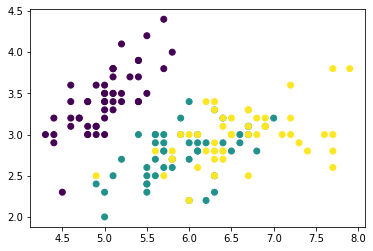

In [3]:
iris  = load_iris()

X = iris.data
Y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=Y)

## sklearn.model_selection

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [6]:
from sklearn.neighbors import KNeighborsClassifier

## 1. model

In [7]:
model = KNeighborsClassifier(n_neighbors=1)

## 2. train (fit)

In [8]:
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

## 3. score 

In [9]:
print('Train score : ', model.score(X_train, Y_train))
print('Test score  : ', model.score(X_test, Y_test))


Train score :  1.0
Test score  :  0.9333333333333333


## ***DataSet*** : 
   ### 1. Train set
   ### 2. Validation set (hyper-parameters)
   ### 3. Test set
### CROSS-VALIDATION : 
##### Elle consiste à entrainer puis valider notre modèle sur plusieurs découpes possibles du Train set

In [10]:
from sklearn.model_selection import cross_val_score 

In [14]:
cross_val_score(KNeighborsClassifier(), X_train, Y_train, cv=5)

array([1.        , 0.95833333, 0.95833333, 1.        , 1.        ])

In [18]:
cross_val_score(KNeighborsClassifier(), X_train, Y_train, cv=5).mean()

0.9833333333333334

### Best parameter

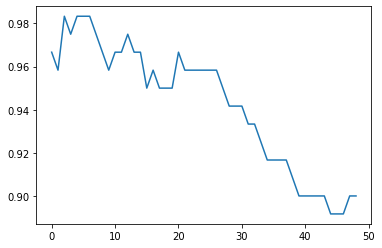

In [17]:
validation_score = []
for i in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(i), X_train, Y_train, cv=5).mean()
    validation_score.append(score)
plt.plot(validation_score)

## Validation Curve 

In [19]:
from sklearn.model_selection import validation_curve

In [21]:
model_ = KNeighborsClassifier()
i = np.arange(1,50)
hparam = 'n_neighbors'

train_score, val_score = validation_curve(model_, X_train, Y_train, hparam, i, cv=5)

train_score.shape

c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


(49, 5)

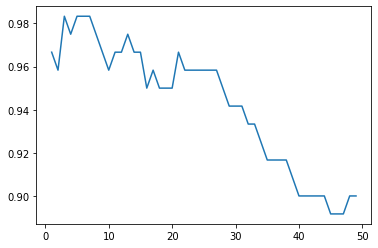

In [26]:
plt.plot(i, val_score.mean(axis=1))

## GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {'n_neighbors': np.arange(1,20),
             'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)

# train grid like an estimator
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [31]:
grid.best_score_, grid.best_params_

(0.9833333333333334, {'metric': 'euclidean', 'n_neighbors': 3})

In [32]:
myModel = grid.best_estimator_

In [33]:
myModel.score(X_test, Y_test)

0.9333333333333333

## learning curve 

In [38]:
from sklearn.model_selection import learning_curve

In [39]:
N, train_score, val_score = learning_curve(myModel, X_train, Y_train, train_sizes=np.linspace(0.2,1.0,5), cv=5)

In [40]:
N

array([19, 38, 57, 76, 96])

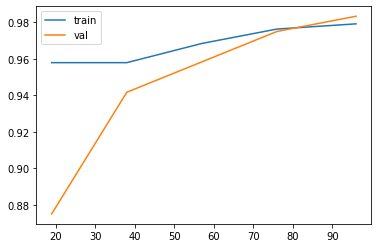

In [42]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='val')
plt.legend()
